In [2]:
# # mount data from google drive to colab
from google.colab import drive
drive.mount('/content/drive')

#import library
import pandas as pd # pandas 
import numpy as np # numpy
import time

ModuleNotFoundError: No module named 'google.colab'

# Prepare and Analyze Data

1. Load Dataset.
2. Analyze Dataset.
3. Preprocess Data.
4. Feature Engineering.

## Load Dataset.

In [ ]:
# read dataset using pandas library 
# read dataset from path and return a pandas dataframe
def read_dataset(path):
    df = pd.read_csv(path)
    display(df.head())
    return df

In [ ]:
PATH = "/content/drive/MyDrive/final_house_loan.csv"
df = read_dataset(PATH)

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


## Analyze data.

In [ ]:
df.describe()

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


<Axes: xlabel='Loan Sanction Amount (USD)', ylabel='Count'>

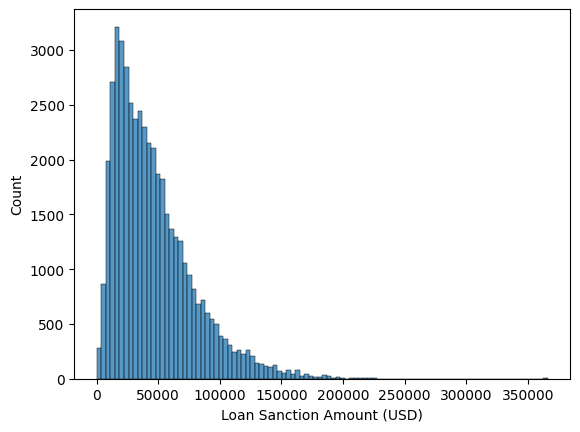

In [ ]:
import seaborn as sns 

# get the last dataframe's column
# plot histogram to visualize Load Sanction Amount(USD) column.
sns.histplot(x=df.columns[-1], data=df, bins=100)


In [ ]:
# check null in all row of dataframe.
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

## Preprocessing 

In [ ]:
# preprocessing null data
def preprocessing_data(data):
    print(f'Len of data before dropping NA: {len(data)}')
    data = data.dropna()
    print(f'Len of data after dropping NA: {len(data)}')
    return data 


In [ ]:
data = preprocessing_data(df.copy())
data.isnull().sum()

Len of data before dropping NA: 47297
Len of data after dropping NA: 47251


Gender                        0
Age                           0
Income (USD)                  0
Income Stability              0
Property Age                  0
Property Location             0
Property Price                0
Loan Sanction Amount (USD)    0
dtype: int64

## Feature Engineering

In [ ]:
data

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336
...,...,...,...,...,...,...,...,...
47292,F,62,2121.48,Low,2135.48,Rural,240291.63,78800.491330
47293,M,38,1506.72,Low,1505.72,Rural,218431.37,72483.293359
47294,F,20,1595.10,Low,1582.10,Semi-Urban,154458.88,52462.861498
47295,F,50,2002.27,Low,2007.27,Semi-Urban,72277.78,22909.596763


In [ ]:
def normalize_data(data):
    data["Gender"] = data["Gender"].astype("category").cat.codes
    data["Income Stability"] = data["Income Stability"].astype("category").cat.codes
    data["Property Location"] = data["Property Location"].astype("category").cat.codes
    
    print(data.head())
    print(data.corr())
    
    return data

In [ ]:
nrl_data = normalize_data(data)

   Gender  Age  Income (USD)  Income Stability  Property Age  \
0       0   19       1641.25                 1       1651.25   
1       1   29       1989.71                 1       1990.71   
2       0   37       1849.91                 1       1856.91   
3       1   65       2735.18                 0       2747.18   
4       0   62       4741.78                 0       4740.78   

   Property Location  Property Price  Loan Sanction Amount (USD)  
0                  0        59641.82                21026.420753  
1                  2       179858.51                60595.183366  
2                  0       117297.62                39181.648002  
3                  0       354417.72               128497.710865  
4                  2        82049.80                39386.919336  
                              Gender       Age  Income (USD)  \
Gender                      1.000000  0.007706     -0.002445   
Age                         0.007706  1.000000     -0.044086   
Income (USD)         

<Axes: >

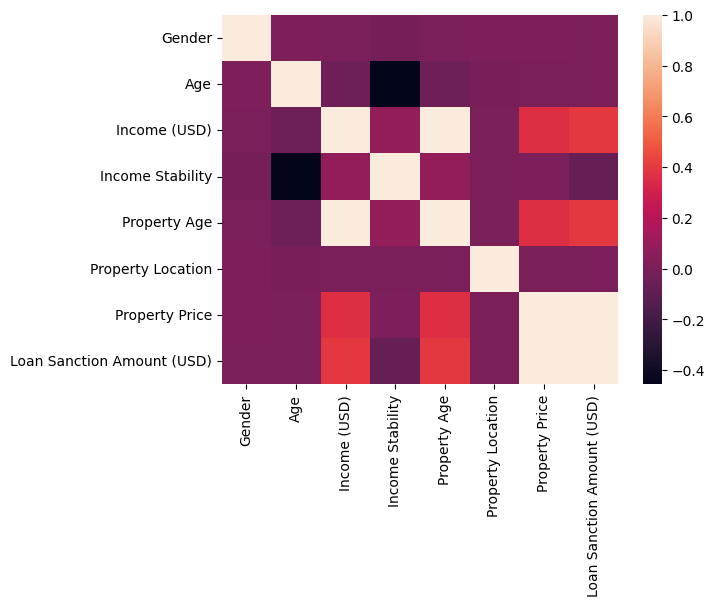

In [ ]:
# heat map 
sns.heatmap(nrl_data.corr())

# Apply machine learning model

In [ ]:
# import sklearn's classes
from sklearn.model_selection import train_test_split

## Train-test split

In [ ]:
# prepare X and y data
def prepare_X_y(data):
    X = data[data.columns[:-1]]
    y = data[data.columns[-1]]
    return X, y

def split_train_test(data, train_size = 0.7, random_state = 1):
    X, y = prepare_X_y(data)
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)
    print(f'Training: {x_train.shape}')
    print(f'Testing: {x_test.shape}')
    
    return x_train, y_train, x_test, y_test 
    


In [ ]:
x_train, y_train, x_test, y_test = split_train_test(data, 0.75, 1)

Training: (35438, 7)
Testing: (11813, 7)


## Basic linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True)
    model = model.fit(X, y)
    return model

In [ ]:
def Linear_Regression_Model(data, train_size=0.7, random_state = 1):
    x_train, y_train, x_test, y_test = split_train_test(data, train_size, random_state)
    model = build_linear_model(x_train, y_train)
    
    # Compare on training dataset
    pred = model.predict(x_train)   
    print("Mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=y_train) )
    # print("Accuracy R2_score of linear model on train set: ", r2_score(y_train, pred))
    pred = model.predict(x_test)   
    print("Mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=y_test) )
    # print("Accuracy R2_score of linear model on train set: ", r2_score(y_test, pred))
    # print(pred.shape)
    # print(y_test.shape)
    # print(accuracy_score(y_pred=pred, y_true=y_test))
    
    print(model.coef_) # print coefficient
    print()
    print(model.intercept_) # print intercept_
    
# Customizing parameter of model
Linear_Regression_Model(data, train_size=0.7, random_state=1)

Training: (33075, 7)
Testing: (14176, 7)
Mean absolute error of linear model on train set  143.0568296100547
Mean absolute error of linear model on test set  150.92800744749505
[-2.46858324e+02 -7.89711164e+01  5.29858008e-01 -1.11423285e+04
  4.95735846e-01 -5.81886741e+01  3.36136896e-01]

11897.738256051576


## Ridge model

In [ ]:
from sklearn.linear_model import Ridge

def build_ridge_model(X, y, alpha):
    model = Ridge(alpha=alpha, fit_intercept=True)
    model = model.fit(X, y)
    return model

In [ ]:
def Ridge_Model(data, train_size=0.7, random_state = 1, alpha = 1):
    x_train, y_train, x_test, y_test = split_train_test(data, train_size, random_state)
    model = build_ridge_model(x_train, y_train, alpha)
    # Compare on training dataset
    pred = model.predict(x_train)   
    print("mean absolute error of ridge model on train set ", mean_absolute_error(y_pred=pred, y_true=y_train) )
    pred = model.predict(x_test)   
    print("mean absolute error of ridge model on test set ", mean_absolute_error(y_pred=pred, y_true=y_test) )

    print(model.coef_) # print coefficient
    print()
    print(model.intercept_) # print intercept_
    return model, mean_absolute_error(y_pred=model.predict(x_test), y_true=y_test)
    

# find the best parameter for ridge model 
# with alpha from [0.0001, 0.001,0.01, 0.1, 1, 10], train_size in [0.7, 0.75, 0.8, 0.85, 0.9]
best_model = None
evaluate = 1e+10
best_train_size = 0
for train_size in np.arange(0.7, 0.95, 0.05):
    for alpha in [i for i in [0.0001, 0.001,0.01, 0.1, 1, 10]]:
        model, mae_test = Ridge_Model(data, train_size, alpha=alpha)
        if (mae_test < evaluate):
            best_model = model
            evaluate = mae_test
            best_train_size = train_size
            
print("\nThe best train_size: ", best_train_size)
print("The best alpha: ", best_model.get_params()["alpha"])
print("mean absolute error of ridge model on test set ", evaluate)

Training: (33075, 7)
Testing: (14176, 7)
mean absolute error of ridge model on train set  143.0568436358769
mean absolute error of ridge model on test set  150.9280220749033
[-2.46858317e+02 -7.89711121e+01  5.29858181e-01 -1.11423279e+04
  4.95735666e-01 -5.81886728e+01  3.36136896e-01]

11897.737614393416
Training: (33075, 7)
Testing: (14176, 7)
mean absolute error of ridge model on train set  143.05696986716828
mean absolute error of ridge model on test set  150.92815372034346
[-2.46858253e+02 -7.89710739e+01  5.29859739e-01 -1.11423232e+04
  4.95734050e-01 -5.81886609e+01  3.36136897e-01]

11897.731839474232
Training: (33075, 7)
Testing: (14176, 7)
mean absolute error of ridge model on train set  143.05823246300653
mean absolute error of ridge model on test set  150.9294704141194
[-2.46857617e+02 -7.89706921e+01  5.29875318e-01 -1.11422759e+04
  4.95717886e-01 -5.81885418e+01  3.36136900e-01]

11897.674090551693
Training: (33075, 7)
Testing: (14176, 7)
mean absolute error of ridge 

In [ ]:
Ridge_Model(data, train_size=0.7, random_state=1, alpha=0.0001)

Training: (33075, 7)
Testing: (14176, 7)
mean absolute error of ridge model on train set  143.0568436358769
mean absolute error of ridge model on test set  150.9280220749033
[-2.46858317e+02 -7.89711121e+01  5.29858181e-01 -1.11423279e+04
  4.95735666e-01 -5.81886728e+01  3.36136896e-01]

11897.737614393416


(Ridge(alpha=0.0001), 150.9280220749033)

## Lasso model

In [ ]:
from sklearn.linear_model import Lasso

def build_lasso_model(X, y, alpha):
    model = Lasso(alpha=alpha, fit_intercept=True)
    model = model.fit(X, y)
    return model

In [ ]:
def Lasso_Model(data, train_size=0.7, random_state = 1, alpha = 1):
    x_train, y_train, x_test, y_test = split_train_test(data, train_size, random_state)
    model = build_lasso_model(x_train, y_train, alpha)
    # Compare on training dataset
    pred = model.predict(x_train)   
    print("mean absolute error of lasso model on train set ", mean_absolute_error(y_pred=pred, y_true=y_train) )
    pred = model.predict(x_test)   
    print("mean absolute error of lasso model on test set ", mean_absolute_error(y_pred=pred, y_true=y_test) )

    print(model.coef_) # print coefficient
    print()
    print(model.intercept_) # print intercept_
    return model, mean_absolute_error(y_pred=model.predict(x_test), y_true=y_test)
    

# find the best parameter for Lasso model 
# with alpha from [0.0001, 0.001,0.01, 0.1, 1, 10], train_size in [0.7, 0.75, 0.8, 0.85, 0.9]
best_model = None
evaluate = 1e+10
best_train_size = 0
for train_size in np.arange(0.7, 0.95, 0.05):
    for alpha in [i for i in [0.0001, 0.001,0.01, 0.1, 1, 10]]:
        model, mae_test = Lasso_Model(data, train_size, alpha=alpha)
        if (mae_test < evaluate):
            best_model = model
            evaluate = mae_test
            best_train_size = train_size
            
print("\nThe best train_size: ", best_train_size)
print("The best alpha: ", best_model.get_params()["alpha"])
print("mean absolute error of lasso model on test set ", evaluate)

Training: (33075, 7)
Testing: (14176, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.510e+10, tolerance: 3.437e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  143.10911587791765
mean absolute error of lasso model on test set  150.95852973308106
[-2.46928611e+02 -7.89700079e+01  8.53940772e-01 -1.11422091e+04
  1.71678268e-01 -5.82273345e+01  3.36136742e-01]

11897.606930319154
Training: (33075, 7)
Testing: (14176, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.510e+10, tolerance: 3.437e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  143.10956823595004
mean absolute error of lasso model on test set  150.95903318272573
[-2.46924925e+02 -7.89698890e+01  8.53940820e-01 -1.11421948e+04
  1.71678055e-01 -5.82259506e+01  3.36136743e-01]

11897.586262610486
Training: (33075, 7)
Testing: (14176, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.507e+10, tolerance: 3.437e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  143.11410839316991
mean absolute error of lasso model on test set  150.964076402599
[-2.46888068e+02 -7.89686999e+01  8.53941302e-01 -1.11420519e+04
  1.71675926e-01 -5.82121118e+01  3.36136753e-01]

11897.379585523748
Training: (33075, 7)
Testing: (14176, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.481e+10, tolerance: 3.437e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  143.16041341925896
mean absolute error of lasso model on test set  151.01548526215646
[-2.46519494e+02 -7.89568090e+01  8.53946129e-01 -1.11406229e+04
  1.71654634e-01 -5.80737233e+01  3.36136850e-01]

11895.312814656398
Training: (33075, 7)
Testing: (14176, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.214e+10, tolerance: 3.437e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  143.7202049372328
mean absolute error of lasso model on test set  151.63032769616126
[-2.42833757e+02 -7.88379005e+01  8.53994391e-01 -1.11263326e+04
  1.71441708e-01 -5.66898383e+01  3.36137825e-01]

11874.645105983152
Training: (33075, 7)
Testing: (14176, 7)
mean absolute error of lasso model on train set  157.33889146729928
mean absolute error of lasso model on test set  165.66640601485548
[-2.05978074e+02 -7.76481566e+01  8.63351490e-01 -1.09834103e+04
  1.60439106e-01 -4.28519233e+01  3.36147565e-01]

11667.92330078913
Training: (35438, 7)
Testing: (11813, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.763e+10, tolerance: 3.691e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  143.95266940522652
mean absolute error of lasso model on test set  154.1075048343706
[-2.53779127e+02 -7.91599308e+01  8.53997819e-01 -1.11526826e+04
  1.71105352e-01 -5.55750019e+01  3.36150190e-01]

11914.839333446376
Training: (35438, 7)
Testing: (11813, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.763e+10, tolerance: 3.691e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  143.95300351423734
mean absolute error of lasso model on test set  154.1078728496721
[-2.53775438e+02 -7.91598123e+01  8.53997853e-01 -1.11526684e+04
  1.71105152e-01 -5.55736208e+01  3.36150191e-01]

11914.818710614534
Training: (35438, 7)
Testing: (11813, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.760e+10, tolerance: 3.691e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  143.95634899869756
mean absolute error of lasso model on test set  154.11155336235547
[-2.53738545e+02 -7.91586272e+01  8.53998192e-01 -1.11525256e+04
  1.71103154e-01 -5.55598103e+01  3.36150200e-01]

11914.612482295961
Training: (35438, 7)
Testing: (11813, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.732e+10, tolerance: 3.691e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  143.9907199735446
mean absolute error of lasso model on test set  154.1495694391774
[-2.53369611e+02 -7.91467756e+01  8.54001585e-01 -1.11510983e+04
  1.71083167e-01 -5.54217051e+01  3.36150290e-01]

11912.550199110367
Training: (35438, 7)
Testing: (11813, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.441e+10, tolerance: 3.691e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  144.42105189056406
mean absolute error of lasso model on test set  154.62657069928366
[-2.49680272e+02 -7.90282598e+01  8.54035512e-01 -1.11368254e+04
  1.70883301e-01 -5.40406530e+01  3.36151187e-01]

11891.927367254379
Training: (35438, 7)
Testing: (11813, 7)
mean absolute error of lasso model on train set  156.7286716707704
mean absolute error of lasso model on test set  167.40468616733017
[-2.12788708e+02 -7.78424349e+01  8.63310078e-01 -1.09940772e+04
  1.59950456e-01 -4.02309222e+01  3.36160155e-01]

11685.653946535851
Training: (37800, 7)
Testing: (9451, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.963e+10, tolerance: 3.957e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  144.5385513444688
mean absolute error of lasso model on test set  160.3296890885872
[-2.49377727e+02 -7.93315239e+01  8.50209401e-01 -1.11562676e+04
  1.72656844e-01 -5.78090479e+01  3.36213681e-01]

11921.575896798466
Training: (37800, 7)
Testing: (9451, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.963e+10, tolerance: 3.957e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  144.53883204551119
mean absolute error of lasso model on test set  160.33003398312715
[-2.49374030e+02 -7.93314053e+01  8.50209437e-01 -1.11562533e+04
  1.72656641e-01 -5.78076600e+01  3.36213681e-01]

11921.555267319753
Training: (37800, 7)
Testing: (9451, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.960e+10, tolerance: 3.957e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  144.54164006537246
mean absolute error of lasso model on test set  160.33348292851727
[-2.49337053e+02 -7.93302202e+01  8.50209800e-01 -1.11561106e+04
  1.72654617e-01 -5.77937818e+01  3.36213690e-01]

11921.348972532673
Training: (37800, 7)
Testing: (9451, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.930e+10, tolerance: 3.957e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  144.57032396018053
mean absolute error of lasso model on test set  160.36840443361353
[-2.48967286e+02 -7.93183691e+01  8.50213433e-01 -1.11546832e+04
  1.72634378e-01 -5.76549994e+01  3.36213777e-01]

11919.286024661931
Training: (37800, 7)
Testing: (9451, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.617e+10, tolerance: 3.957e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  144.93290702626285
mean absolute error of lasso model on test set  160.7910976820252
[-2.45269620e+02 -7.91998577e+01  8.50249762e-01 -1.11404098e+04
  1.72431988e-01 -5.62671750e+01  3.36214649e-01]

11898.656545954422
Training: (37800, 7)
Testing: (9451, 7)
mean absolute error of lasso model on train set  156.23480098597258
mean absolute error of lasso model on test set  172.7916355066199
[-2.08294493e+02 -7.80140406e+01  8.59393298e-01 -1.09976557e+04
  1.61628928e-01 -4.23895950e+01  3.36223360e-01]

11692.314263623128
Training: (40163, 7)
Testing: (7088, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.242e+10, tolerance: 4.224e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  144.55256548561906
mean absolute error of lasso model on test set  168.38477192468116
[-2.43939079e+02 -7.93193480e+01  8.48828929e-01 -1.11557837e+04
  1.74434941e-01 -5.96668806e+01  3.36232665e-01]

11916.189923166938
Training: (40163, 7)
Testing: (7088, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.241e+10, tolerance: 4.224e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  144.55287992261376
mean absolute error of lasso model on test set  168.3850940541628
[-2.43935381e+02 -7.93192294e+01  8.48828968e-01 -1.11557695e+04
  1.74434734e-01 -5.96654905e+01  3.36232666e-01]

11916.169295624342
Training: (40163, 7)
Testing: (7088, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.238e+10, tolerance: 4.224e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  144.5560312360019
mean absolute error of lasso model on test set  168.3883153489476
[-2.43898396e+02 -7.93180441e+01  8.48829349e-01 -1.11556266e+04
  1.74432657e-01 -5.96515894e+01  3.36232674e-01]

11915.963020198455
Training: (40163, 7)
Testing: (7088, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.202e+10, tolerance: 4.224e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  144.58837646395565
mean absolute error of lasso model on test set  168.42116406875883
[-2.43528548e+02 -7.93061910e+01  8.48833165e-01 -1.11541979e+04
  1.74411894e-01 -5.95125781e+01  3.36232758e-01]

11913.900265939374
Training: (40163, 7)
Testing: (7088, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.835e+10, tolerance: 4.224e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  144.98188200809489
mean absolute error of lasso model on test set  168.83716855740533
[-2.39830068e+02 -7.91876596e+01  8.48871327e-01 -1.11399112e+04
  1.74204260e-01 -5.81224653e+01  3.36233597e-01]

11893.272723348819
Training: (40163, 7)
Testing: (7088, 7)
mean absolute error of lasso model on train set  156.39361632604124
mean absolute error of lasso model on test set  180.7208420375781
[-2.02846712e+02 -7.80015980e+01  8.57399216e-01 -1.09970229e+04
  1.63982737e-01 -4.42219479e+01  3.36241976e-01]

11686.946978839493
Training: (42525, 7)
Testing: (4726, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.623e+10, tolerance: 4.470e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  148.70040839147313
mean absolute error of lasso model on test set  155.36112118710997
[-2.50675706e+02 -7.94058692e+01  8.51229750e-01 -1.11554040e+04
  1.73330257e-01 -6.03229360e+01  3.36239523e-01]

11921.941002389234
Training: (42525, 7)
Testing: (4726, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.623e+10, tolerance: 4.470e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  148.7006497575273
mean absolute error of lasso model on test set  155.3613348276512
[-2.50671997e+02 -7.94057506e+01  8.51229795e-01 -1.11553897e+04
  1.73330041e-01 -6.03215478e+01  3.36239524e-01]

11921.920369424843
Training: (42525, 7)
Testing: (4726, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.619e+10, tolerance: 4.470e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  148.70307226675507
mean absolute error of lasso model on test set  155.36348597211946
[-2.50634909e+02 -7.94045646e+01  8.51230249e-01 -1.11552468e+04
  1.73327881e-01 -6.03076650e+01  3.36239532e-01]

11921.714039781014
Training: (42525, 7)
Testing: (4726, 7)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.578e+10, tolerance: 4.470e+09
  model = cd_fast.enet_coordinate_descent(


mean absolute error of lasso model on train set  148.72800702302683
mean absolute error of lasso model on test set  155.38569354540658
[-2.50264029e+02 -7.93927040e+01  8.51234783e-01 -1.11538179e+04
  1.73306277e-01 -6.01688374e+01  3.36239614e-01]

11919.650743342863
Training: (42525, 7)
Testing: (4726, 7)
mean absolute error of lasso model on train set  149.05445334331128
mean absolute error of lasso model on test set  155.6820989690484
[-2.46555229e+02 -7.92740985e+01  8.51280126e-01 -1.11395285e+04
  1.73090237e-01 -5.87805609e+01  3.36240437e-01]

11899.017778961272
Training: (42525, 7)
Testing: (4726, 7)
mean absolute error of lasso model on train set  159.79981089995576
mean absolute error of lasso model on test set  166.44509865887738
[-2.09468426e+02 -7.80873113e+01  8.59485901e-01 -1.09966139e+04
  1.63178625e-01 -4.48982944e+01  3.36248662e-01]

11692.638374905786

The best train_size:  0.7
The best alpha:  0.0001
mean absolute error of lasso model on test set  150.95852973

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.160e+10, tolerance: 4.470e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
Lasso_Model(data, train_size=0.7, random_state=1, alpha=.0001)

Training: (33075, 7)
Testing: (14176, 7)
mean absolute error of lasso model on train set  143.10911587791765
mean absolute error of lasso model on test set  150.95852973308106
[-2.46928611e+02 -7.89700079e+01  8.53940772e-01 -1.11422091e+04
  1.71678268e-01 -5.82273345e+01  3.36136742e-01]

11897.606930319154


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.510e+10, tolerance: 3.437e+09
  model = cd_fast.enet_coordinate_descent(


(Lasso(alpha=0.0001), 150.95852973308106)

## ElasticNet model

In [ ]:
from sklearn.linear_model import ElasticNet
def build_elastic_model(X, y, alpha, l1_ratio ):
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=True)
    return model

In [ ]:
def ElasticNet_Model(data, train_size=0.7, random_state = 1, alpha = 1, l1_ratio=0.5):
  x_train, y_train, x_test, y_test = split_train_test(data, train_size, random_state)
  model = build_ridge_model(x_train, y_train, alpha)
  # Compare on training dataset
  pred = model.predict(x_train)   
  print("mean absolute error of ElasticNet model on train set ", mean_absolute_error(y_pred=pred, y_true=y_train) )
  pred = model.predict(x_test)   
  print("mean absolute error of ElasticNet model on test set ", mean_absolute_error(y_pred=pred, y_true=y_test) )

  print(model.coef_) # print coefficient
  print()
  print(model.intercept_) # print intercept_

  return model, mean_absolute_error(y_pred=model.predict(x_test), y_true=y_test)
    

# find the best parameter for ElasticNet model 
# with alpha in [0.0001, 0.001,0.01, 0.1, 1, 10], train_size in [0.7, 0.75, 0.8, 0.85, 0.9]
# l1_ratio from 0.1->1
best_model = None
evaluate = 1e+10
best_train_size = 0
best_ratio = 0
for train_size in np.arange(0.7, 0.95, 0.05):
    for alpha in [i for i in [0.0001, 0.001,0.01, 0.1, 1, 10]]:
      for ratio in np.arange(0.1, 1, 0.1):
        model, mae_test = ElasticNet_Model(data, train_size, alpha=alpha, l1_ratio=ratio)
        if (mae_test < evaluate):
            best_model = model
            evaluate = mae_test
            best_train_size = train_size
            best_ratio = ratio
            
print("\nThe best train_size: ", best_train_size)
print("The best alpha: ", best_model.get_params()["alpha"])
print("The best l1_ratio: ", best_ratio)
print("mean absolute error of ElasticNet model on test set ", evaluate)

Training: (33075, 7)
Testing: (14176, 7)
mean absolute error of ElasticNet model on train set  143.0568436358769
mean absolute error of ElasticNet model on test set  150.9280220749033
[-2.46858317e+02 -7.89711121e+01  5.29858181e-01 -1.11423279e+04
  4.95735666e-01 -5.81886728e+01  3.36136896e-01]

11897.737614393416
Training: (33075, 7)
Testing: (14176, 7)
mean absolute error of ElasticNet model on train set  143.0568436358769
mean absolute error of ElasticNet model on test set  150.9280220749033
[-2.46858317e+02 -7.89711121e+01  5.29858181e-01 -1.11423279e+04
  4.95735666e-01 -5.81886728e+01  3.36136896e-01]

11897.737614393416
Training: (33075, 7)
Testing: (14176, 7)
mean absolute error of ElasticNet model on train set  143.0568436358769
mean absolute error of ElasticNet model on test set  150.9280220749033
[-2.46858317e+02 -7.89711121e+01  5.29858181e-01 -1.11423279e+04
  4.95735666e-01 -5.81886728e+01  3.36136896e-01]

11897.737614393416
Training: (33075, 7)
Testing: (14176, 7)
me

In [ ]:
ElasticNet_Model(data,train_size=0.7, random_state=1, alpha=0.0001, l1_ratio=0.1)

Training: (33075, 7)
Testing: (14176, 7)
mean absolute error of ElasticNet model on train set  143.0568436358769
mean absolute error of ElasticNet model on test set  150.9280220749033
[-2.46858317e+02 -7.89711121e+01  5.29858181e-01 -1.11423279e+04
  4.95735666e-01 -5.81886728e+01  3.36136896e-01]

11897.737614393416


(Ridge(alpha=0.0001), 150.9280220749033)

## Compare 3 models: Ridge, Lasso, ElasticNet with Linear model.

In [ ]:
def compare_models(data, train_size=0.7, random_state=1, alpha = 1, l1_ratio = 0.5):
  print("Ridge Model:")
  Ridge_Model(data, train_size, random_state, alpha)
  print("\nLasso Model:")
  Lasso_Model(data, train_size, random_state, alpha)
  print("\nElasticNet Model:")
  ElasticNet_Model(data,train_size, random_state, alpha, l1_ratio)
  print("\nLinear Model:")
  Linear_Regression_Model(data, train_size, random_state)
  pass

compare_models(data, train_size=0.7, random_state=1, alpha=0.0001, l1_ratio=0.1)

Ridge Model:
Training: (33075, 7)
Testing: (14176, 7)
mean absolute error of ridge model on train set  143.0568436358769
mean absolute error of ridge model on test set  150.9280220749033
[-2.46858317e+02 -7.89711121e+01  5.29858181e-01 -1.11423279e+04
  4.95735666e-01 -5.81886728e+01  3.36136896e-01]

11897.737614393416

Lasso Model:
Training: (33075, 7)
Testing: (14176, 7)
mean absolute error of lasso model on train set  143.10911587791765
mean absolute error of lasso model on test set  150.95852973308106
[-2.46928611e+02 -7.89700079e+01  8.53940772e-01 -1.11422091e+04
  1.71678268e-01 -5.82273345e+01  3.36136742e-01]

11897.606930319154

ElasticNet Model:
Training: (33075, 7)
Testing: (14176, 7)
mean absolute error of ElasticNet model on train set  143.0568436358769
mean absolute error of ElasticNet model on test set  150.9280220749033
[-2.46858317e+02 -7.89711121e+01  5.29858181e-01 -1.11423279e+04
  4.95735666e-01 -5.81886728e+01  3.36136896e-01]

11897.737614393416

Linear Model:


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.510e+10, tolerance: 3.437e+09
  model = cd_fast.enet_coordinate_descent(


## Polynomial Transform

In [ ]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y, degree):
    poly_model = make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())
    poly_model.fit(X, y)  
    return poly_model

def Linear_Model_PolynomialFeatures(data, degree=2, train_size = 0.7, random_state = 1):
  x_train, y_train, x_test, y_test = split_train_test(data, train_size, random_state)
  poly_model = build_pipeline(x_train, y_train, degree)
  # Compare on training dataset
  poly_pred = poly_model.predict(x_train)   
  print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=y_train) )

  poly_pred = poly_model.predict(x_test)
  print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=y_test))
  pass

Linear_Model_PolynomialFeatures(data, degree = 2)
print()
Linear_Model_PolynomialFeatures(data, degree = 3)
print()
Linear_Model_PolynomialFeatures(data, degree = 5)
print()
Linear_Model_PolynomialFeatures(data, degree = 6)

Training: (33075, 7)
Testing: (14176, 7)
mean absolute error of linear model (with poly transform) on train set  136.44075330061438
mean absolute error of linear model (with poly transform) on test set  145.95789723678425

Training: (33075, 7)
Testing: (14176, 7)
mean absolute error of linear model (with poly transform) on train set  353.0295993719322
mean absolute error of linear model (with poly transform) on test set  362.6449032906837

Training: (33075, 7)
Testing: (14176, 7)
mean absolute error of linear model (with poly transform) on train set  6673.716370349918
mean absolute error of linear model (with poly transform) on test set  7268.1206217695635

Training: (33075, 7)
Testing: (14176, 7)
mean absolute error of linear model (with poly transform) on train set  8991.60421160654
mean absolute error of linear model (with poly transform) on test set  11492.972861106531


1. We can see that with polynomial of order 2, the absolute mean error of the model on train set is 136.44 and on test set is 145.96, smaller than the above models.
2. If the n degree become larger(in this case i choose n = 6), the model will lead the problems such as:
* Performance is poor because the model runs much slower.
* The absolute mean error of the model on train set and test set be more larger and the distance between them also more larger. These things can lead to overfit model which cause a bad prediction, or wrong model.